In [1]:
import pandas as pd
from collections import defaultdict
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import precision_score, recall_score, f1_score
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [4]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
df = df.convert_dtypes()

In [6]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors ='coerce' )

In [7]:
df.isna().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [8]:
df = df.dropna()

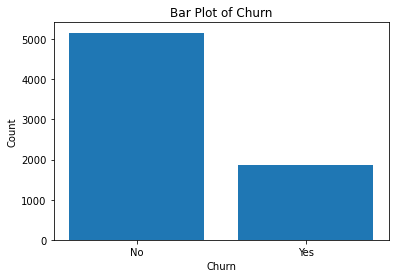

In [9]:
def plot_bar(df, column):
    counts = df[column].value_counts()
    labels = counts.index
    values = counts.values

    plt.bar(labels, values)
    plt.xlabel(column)
    plt.ylabel("Count")
    plt.title(f"Bar Plot of {column}")
    plt.show()


plot_bar(df, "Churn")

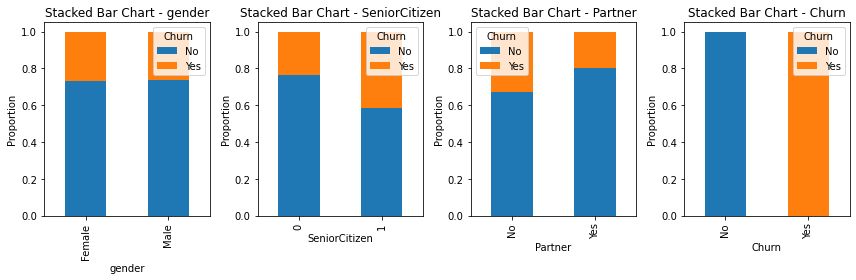

In [10]:
columns = ['gender', 'SeniorCitizen', 'Partner', 'Churn']
df_subset = df[columns]

# Create a stacked cross-tabulation for each column
cross_tabs = [pd.crosstab(df_subset[column], df_subset["Churn"], normalize='index') for column in columns]

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Iterate over each cross-tabulation and plot the stacked bar chart in a subplot
for i, cross_tab in enumerate(cross_tabs):
    # Select the subplot
    ax = axes[i]
    
    # Create the stacked bar chart
    cross_tab.plot(kind="bar", stacked=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Proportion")
    ax.set_title("Stacked Bar Chart - {}".format(columns[i]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the matrix of charts
plt.show()

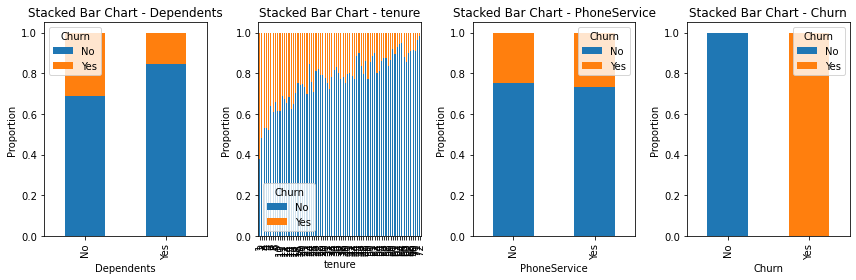

In [11]:
columns = ['Dependents','tenure', 'PhoneService',"Churn"]
df_subset = df[columns]

# Create a stacked cross-tabulation for each column
# Create a stacked cross-tabulation for each column
cross_tabs = [pd.crosstab(df_subset[column], df_subset["Churn"], normalize='index') for column in columns]

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Iterate over each cross-tabulation and plot the stacked bar chart in a subplot
for i, cross_tab in enumerate(cross_tabs):
    # Select the subplot
    ax = axes[i]
    
    # Create the stacked bar chart
    cross_tab.plot(kind="bar", stacked=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Proportion")
    ax.set_title("Stacked Bar Chart - {}".format(columns[i]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the matrix of charts
plt.show()

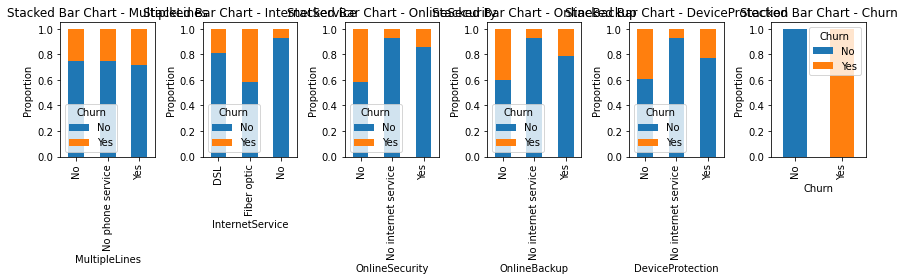

In [12]:
columns = ['MultipleLines', 'InternetService','OnlineSecurity','OnlineBackup', 'DeviceProtection','Churn']
df_subset = df[columns]

# Create a stacked cross-tabulation for each column
# Create a stacked cross-tabulation for each column
cross_tabs = [pd.crosstab(df_subset[column], df_subset["Churn"], normalize='index') for column in columns]

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Iterate over each cross-tabulation and plot the stacked bar chart in a subplot
for i, cross_tab in enumerate(cross_tabs):
    # Select the subplot
    ax = axes[i]
    
    # Create the stacked bar chart
    cross_tab.plot(kind="bar", stacked=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Proportion")
    ax.set_title("Stacked Bar Chart - {}".format(columns[i]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the matrix of charts
plt.show()

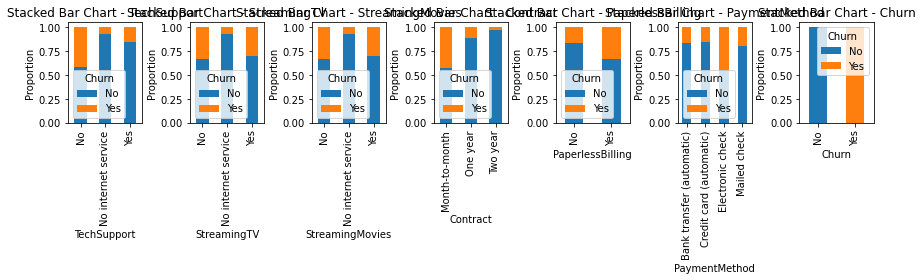

In [13]:
columns = [ 'TechSupport','StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling',
       'PaymentMethod','Churn']
df_subset = df[columns]

# Create a stacked cross-tabulation for each column
cross_tabs = [pd.crosstab(df_subset[column], df_subset["Churn"], normalize='index') for column in columns]

# Create a matrix of subplots
fig, axes = plt.subplots(nrows=1, ncols=len(columns), figsize=(12, 4))

# Iterate over each cross-tabulation and plot the stacked bar chart in a subplot
for i, cross_tab in enumerate(cross_tabs):
    # Select the subplot
    ax = axes[i]
    
    # Create the stacked bar chart
    cross_tab.plot(kind="bar", stacked=True, ax=ax)
    
    # Add labels and title
    ax.set_xlabel(columns[i])
    ax.set_ylabel("Proportion")
    ax.set_title("Stacked Bar Chart - {}".format(columns[i]))

# Adjust spacing between subplots
plt.tight_layout()

# Display the matrix of charts
plt.show()

In [14]:
df_numerical  = df[['MonthlyCharges', 'TotalCharges']]
df_categorical = df.drop(['MonthlyCharges', 'TotalCharges','customerID'],axis = 1)

In [15]:
df_categorical

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,Yes


In [16]:
# Encoding the variable
d = defaultdict(LabelEncoder)
df_categorical = df_categorical.apply(lambda x: d[x.name].fit_transform(x))
df_categorical

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,0
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,0
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,0
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,1


In [17]:
finaldf = pd.concat([df_categorical, df_numerical], axis=1)
finaldf

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,1,0,0,2,0,0,0,0,0,1,2,0,29.85,29.85
1,1,0,0,0,33,1,0,0,2,0,2,0,0,0,1,0,3,0,56.95,1889.50
2,1,0,0,0,1,1,0,0,2,2,0,0,0,0,0,1,3,1,53.85,108.15
3,1,0,0,0,44,0,1,0,2,0,2,2,0,0,1,0,0,0,42.3,1840.75
4,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,2,1,70.7,151.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,23,1,2,0,2,0,2,2,2,2,1,1,3,0,84.8,1990.50
7039,0,0,1,1,71,1,2,1,0,2,2,0,2,2,1,1,1,0,103.2,7362.90
7040,0,0,1,1,10,0,1,0,2,0,0,0,0,0,0,1,2,0,29.6,346.45
7041,1,1,1,0,3,1,2,1,0,0,0,0,0,0,0,1,3,1,74.4,306.60


In [18]:
X = finaldf.drop(['Churn'],axis = 1)
y = finaldf['Churn']
X.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [19]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
param_grid = {
    'max_depth': [3, 4, 5,6,7,8,9],
    'min_samples_split': [10, 20, 40],
    'min_samples_leaf': [5, 10, 15]
}

# Create an instance of the DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.7644550487399862
Recall: 0.7725657427149965
F1 Score: 0.7675909864964592


In [21]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.1, 0.5, 1.0]
}

# Create an instance of the AdaBoostClassifier
clf = AdaBoostClassifier()

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the metrics
print("Best Parameters:", best_params)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Best Parameters: {'learning_rate': 0.5, 'n_estimators': 150}
Precision: 0.7816576779558898
Recall: 0.7924662402274343
F1 Score: 0.7841610179380283


In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [10, 15, 20],
    'min_samples_leaf': [5, 10, 15]
}

# Create an instance of the RandomForestClassifier
clf = RandomForestClassifier()

# Create a GridSearchCV object with the classifier and parameter grid
grid_search = GridSearchCV(clf, param_grid, scoring='f1')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the best parameters and metrics
print("Best Parameters:", grid_search.best_params_)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

In [27]:
df=df.drop("customerID",axis='columns')

In [28]:
columns=['gender', 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

In [29]:
df_one_hot=pd.get_dummies(df, columns = columns)

In [31]:
# df_one_hot["churn_encoded"] = df_one_hot["Churn"].replace({"Yes":1,"No":0})
df_one_hot["TotalCharges"]=pd.to_numeric(df_one_hot["TotalCharges"], errors='coerce')
df_one_hot=df_one_hot.dropna(subset=["TotalCharges"])

In [33]:
# corr = df_one_hot.corr()
# corr.style.background_gradient(cmap='coolwarm')

In [34]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   Int64  
 1   tenure                                   7032 non-null   Int64  
 2   MonthlyCharges                           7032 non-null   Float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   string 
 5   gender_Female                            7032 non-null   uint8  
 6   gender_Male                              7032 non-null   uint8  
 7   Partner_No                               7032 non-null   uint8  
 8   Partner_Yes                              7032 non-null   uint8  
 9   Dependents_No                            7032 non-null   uint8  
 10  Dependents_Yes                           7032 no

In [36]:
selected_columns = df_one_hot.drop(['Churn'], axis=1).columns
df_one_hot[selected_columns] = StandardScaler().fit_transform(df_one_hot[selected_columns])

In [37]:
df_one_hot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   float64
 1   tenure                                   7032 non-null   float64
 2   MonthlyCharges                           7032 non-null   float64
 3   TotalCharges                             7032 non-null   float64
 4   Churn                                    7032 non-null   string 
 5   gender_Female                            7032 non-null   float64
 6   gender_Male                              7032 non-null   float64
 7   Partner_No                               7032 non-null   float64
 8   Partner_Yes                              7032 non-null   float64
 9   Dependents_No                            7032 non-null   float64
 10  Dependents_Yes                           7032 no

In [38]:
pca = PCA(n_components=45)
principalComponents = pca.fit_transform(df_one_hot[selected_columns])
principals=pd.DataFrame(principalComponents)

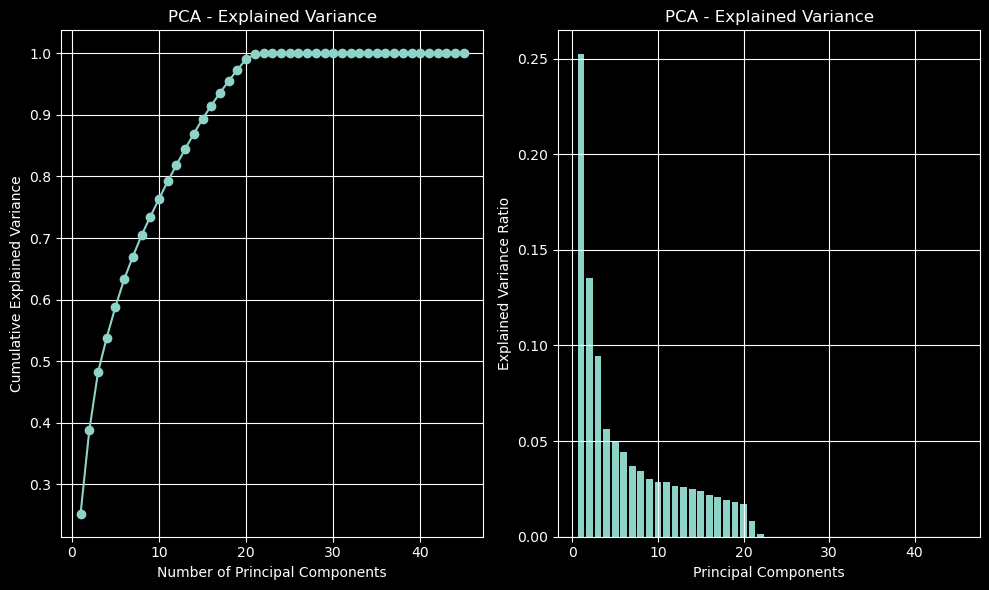

In [39]:
explained_variances = pca.explained_variance_ratio_
cumulative_variances = np.cumsum(explained_variances)

# Plot the explained variance ratios
plt.figure(figsize=(10, 6))

# Line plot
plt.subplot(1, 2, 1)
plt.plot(range(1, len(explained_variances) + 1), cumulative_variances, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Explained Variance')
plt.grid(True)

# Bar plot
plt.subplot(1, 2, 2)
plt.bar(range(1, len(explained_variances) + 1), explained_variances)
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance')
plt.grid(True)

plt.tight_layout()
plt.show()

In [42]:
df_pca=pd.concat((principals.iloc[:,0:14], df_one_hot[['Churn']]), axis=1)
df_pca.shape

(7043, 15)

In [43]:
df_pca.isna().sum()

0        11
1        11
2        11
3        11
4        11
5        11
6        11
7        11
8        11
9        11
10       11
11       11
12       11
13       11
Churn    11
dtype: int64

In [45]:
df_pca=df_pca.dropna()
X_hat = df_pca.drop(['Churn'],axis = 1)
y_hat= df_pca['Churn']

In [46]:
y_hat.shape

(7021,)

In [47]:
X_hat_train, X_hat_test,y_hat_train, y_hat_test = train_test_split(X_hat,y_hat ,
                                   random_state=1, 
                                   test_size=0.2)

In [48]:
print(y_hat_test.shape)
print(X_hat_test.shape)
print(y_hat_train.shape)
print(X_hat_train.shape)

(1405,)
(1405, 14)
(5616,)
(5616, 14)


In [52]:
for k in range(3,12,2):  
    knn = KNeighborsClassifier(n_neighbors = k)
    # train the model
    knn.fit(X_hat_train, y_hat_train)

    # get the predict value from X_test
    y_pred = knn.predict(X_hat_test)

    # Calculate precision, recall, and F1 score
    precision = precision_score(y_hat_test, y_pred, average='weighted')
    recall = recall_score(y_hat_test, y_pred, average='weighted')
    f1 = f1_score(y_hat_test, y_pred, average='weighted')

    # Print the metrics
    print("N_neighbors:",k)
   #  print("Best Parameters:", best_params)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)
    print("")


N_neighbors: 3
Precision: 0.6316350449076428
Recall: 0.6690391459074733
F1 Score: 0.6459429369585907

N_neighbors: 5
Precision: 0.6229435305617084
Recall: 0.6889679715302491
F1 Score: 0.6422614371229942

N_neighbors: 7
Precision: 0.6324880982650473
Recall: 0.7067615658362989
F1 Score: 0.6472832775274793

N_neighbors: 9
Precision: 0.6196440721151558
Recall: 0.708185053380783
F1 Score: 0.6380563250926348

N_neighbors: 11
Precision: 0.6217047313740094
Recall: 0.7167259786476868
F1 Score: 0.6365733056159537

